<a href="https://colab.research.google.com/github/yohan2001colombo/NLP/blob/main/Tutorial_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 03 Report: Phonological and Morphological Analysis

## 1. Introduction
This report covers the implementation and analysis of phonological and morphological features in Python using libraries such as pronouncing, panphon, nltk, and pyphen. The tasks include phonetic transcription, phonological feature extraction, stress pattern analysis, and morphological analysis

In [ ]:
import nltk
import epitran
import panphon
import matplotlib
import pyphen

## 2. Phonetic Transcription Using Pronouncing

In [ ]:
import pronouncing

words = ["phonetics","phonology","morphology","analysis","transcription"]
transcriptions = {}

for word in words:
    transcription = pronouncing.phones_for_word(word)
    transcriptions[word] = transcription[0] if transcription else "No transcrption found"
print(transcriptions)



{'phonetics': 'F AH0 N EH1 T IH0 K S', 'phonology': 'F AH0 N AA1 L AH0 JH IY2', 'morphology': 'M AO0 R F AA1 L AH0 JH IY0', 'analysis': 'AH0 N AE1 L AH0 S AH0 S', 'transcription': 'T R AE2 N S K R IH1 P SH AH0 N'}


Explanation:
* The **pronouncing** library retrieves ARPAbet phonetic transcriptions for given
words.

* The output shows stress markers (e.g., **EH1** for primary stress, **AH0** for reduced vowels).

## 3. Phonological Feature Extraction with Panphon

In [ ]:
import panphon

# define ARPAbet to IPA mapping (extend as needed)
arpabet_to_ipa = arpabet_to_ipa = {
    'P': 'p', 'B': 'b', 'K': 'k', 'D': 'd', 'G': 'g',
    'T': 't', 'DH': 'ð', 'N': 'n', 'M': 'm', 'NG': 'ŋ',
    'S': 's', 'Z': 'z', 'SH': 'ʃ', 'ZH': 'ʒ', 'CH': 'ʧ',
    'JH': 'ʤ', 'Y': 'j', 'W': 'w', 'R': 'ɹ', 'L': 'l',
    'Y': 'j', 'IY': 'iː', 'IH': 'ɪ', 'EH': 'ɛ', 'AE': 'æ',
    'AA': 'ɑː', 'AO': 'ɔː', 'UH': 'ʊ', 'UW': 'uː', 'ER': 'ɜː',
    'AH': 'ə', 'AW': 'aʊ', 'OY': 'ɔɪ', 'OW': 'oʊ', 'OY': 'ɔɪ',
    'AY': 'aɪ', 'EH0': 'ə', 'IH0': 'ɪ', 'AH0': 'ə', 'UH0': 'ʊ',
    'AW0': 'aʊ', 'OY0': 'ɔɪ', 'OW0': 'oʊ', 'AY0': 'aɪ'
}
# This expanded dictionary includes a broader range of ARPAbet symbols and their IPA equivalents. You can further extend this mapping based on your specific requirements.

#Functional to convert ARPAbet to IPA
def arpabet_to_ipa_converter(arpabet):
    return ''.join([arpabet_to_ipa.get(ph.strip('0123456789'),'') for ph in arpabet.split()]) # The function strips these markers, potentially losing stress information.

# Example transcription dictionary
transcriptions = {'phonetics': 'F AH0 N EH1 T IH0 K S', 'phonology': 'F AH0 N AA1 L AH0 JH IY2', 'morphology': 'M AO0 R F AA1 L AH0 JH IY0', 'analysis': 'AH0 N AE1 L AH0 S AH0 S', 'transcription': 'T R AE2 N S K R IH1 P SH AH0 N'}

ft = panphon.FeatureTable()

# Generate phonological features for each word
features = {
    word : ft.word_fts(arpabet_to_ipa_converter(trans)) for word,trans in transcriptions.items()
    if trans != "No transcription found"

}
# After converting ARPAbet transcriptions to IPA, the code uses PanPhon's FeatureTable class to analyze the phonological features of each word. The word_fts method returns a list of Segment objects, each representing a phoneme with its articulatory features

# print the features
print(features)

# Each Segment object contains a list of features such as syl (syllabic), son (sonorant), cont (continuant), and so on, with values indicating their presence (+), absence (-), or neutrality (0).


# These features can be utilized for various linguistic analyses, including phoneme classification, language comparison, and phonological pattern recognition

{'phonetics': [<Segment [+syl, +son, -cons, +cont, -delrel, -lat, -nas, -strid, +voi, -sg, -cg, 0ant, -cor, 0distr, -lab, -hi, -lo, +back, -round, -velaric, -tense, -long, 0hitone, 0hireg]>, <Segment [-syl, +son, +cons, -cont, -delrel, -lat, +nas, -strid, +voi, -sg, -cg, +ant, +cor, -distr, -lab, -hi, -lo, -back, -round, -velaric, 0tense, -long, 0hitone, 0hireg]>, <Segment [+syl, +son, -cons, +cont, -delrel, -lat, -nas, -strid, +voi, -sg, -cg, 0ant, -cor, 0distr, -lab, -hi, -lo, -back, -round, -velaric, -tense, -long, 0hitone, 0hireg]>, <Segment [-syl, -son, +cons, -cont, -delrel, -lat, -nas, -strid, -voi, -sg, -cg, +ant, +cor, -distr, -lab, -hi, -lo, -back, -round, -velaric, 0tense, -long, 0hitone, 0hireg]>, <Segment [+syl, +son, -cons, +cont, -delrel, -lat, -nas, -strid, +voi, -sg, -cg, 0ant, -cor, 0distr, -lab, +hi, -lo, -back, -round, -velaric, -tense, -long, 0hitone, 0hireg]>, <Segment [-syl, -son, +cons, -cont, -delrel, -lat, -nas, -strid, -voi, -sg, -cg, -ant, -cor, 0distr, -lab

Explanation:
* Converts ARPAbet to IPA and extracts phonological features (e.g., **+syl** for syllabic, **-cons** for non-consonantal).

* Useful for phoneme classification and linguistic research.

## 4. Phonome Frequency Analysis

In [ ]:
from collections import Counter

#split all transcriptions into phonemes(by space),then
all_phonemes = "".join(transcriptions.values()).split()
phoneme_counts = Counter(all_phonemes)

print(phoneme_counts)

Counter({'AH0': 7, 'N': 5, 'L': 3, 'R': 3, 'F': 2, 'K': 2, 'AA1': 2, 'JH': 2, 'S': 2, 'EH1': 1, 'T': 1, 'IH0': 1, 'SF': 1, 'IY2M': 1, 'AO0': 1, 'IY0AH0': 1, 'AE1': 1, 'ST': 1, 'AE2': 1, 'IH1': 1, 'P': 1, 'SH': 1})


Explanation:
* Counts occurrences of each phoneme.

* AH0 (schwa) is the most frequent, indicating its common use in English

In [ ]:
"".join(transcriptions.values()).split();

## 5. Stress Pattern Analysis with CMU Dictionary

In [ ]:
nltk.download('cmudict')

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


True

In [ ]:
from nltk.corpus import cmudict

# Initialize the CMU Pronouncing Dictionary
d = cmudict.dict()

# Make sure 'words' is defined
words = ['phonetics','phonology','morphology','analysis','transcription']

stress_patterns = {}

for word in words:
  if word in d:
    trans = d[word][0]
    pattern = ''.join(['1' if '1' in ph else '0' for ph in trans])
    stress_patterns[word] = pattern
  else:
    stress_patterns[word] = "No found"

print(stress_patterns)



{'phonetics': '00010000', 'phonology': '00010000', 'morphology': '000010000', 'analysis': '00100000', 'transcription': '000000010000'}


Explanation:
* Extracts stress patterns from the CMU Pronouncing Dictionary.

* 1 indicates primary stress, 0 indicates unstressed syllables.

In [ ]:
d["phonetics"][0]

['F', 'AH0', 'N', 'EH1', 'T', 'IH0', 'K', 'S']

## 6. Vowel and Consonants Analysis

In [ ]:
from collections import Counter

# Define ARPAbet vowel phonemes
arpabwt_vowels = {"AA", "AE", "AH", "AO", "AW", "AY", "EH", "ER", "EY", "IH","IY", "OW", "OY", "UH", "UW"}

#combine all the transcriptions and split into phonemes
phonemes = " ".join(transcriptions.values()).split()

# Seperate vowels and consonants (strip stress digits)
vowels = [ph for ph in phonemes if ph.strip('0123456789') in arpabwt_vowels]
consonants = [ph for ph in phonemes if ph.strip('0123456789') not in arpabwt_vowels]

# Count
vowel_count = Counter(vowels)
consonant_count = Counter(consonants)

print("Vowels:",vowel_count)
print("Consonants:",consonant_count)




Vowels: Counter({'AH0': 8, 'AA1': 2, 'EH1': 1, 'IH0': 1, 'IY2': 1, 'AO0': 1, 'IY0': 1, 'AE1': 1, 'AE2': 1, 'IH1': 1})
Consonants: Counter({'N': 5, 'S': 4, 'F': 3, 'L': 3, 'R': 3, 'T': 2, 'K': 2, 'JH': 2, 'M': 1, 'P': 1, 'SH': 1})


Explanation:
* Separates vowels and consonants from transcriptions.

* Useful for studying phonotactics or syllable structure.

## 8. Phonological Rule Application

In [ ]:
voiceless_to_voiced = {'p':'b','t':'d','k':'g'}

def apply_voicing_rule ( word ) :
  return ''.join([voiceless_to_voiced.get(ch,ch) for ch in word])

new_transcriptions = { w : apply_voicing_rule ( t . replace( '' ,''))for w,t in transcriptions . items () if t != "No transcription found" }
print ( new_transcriptions )


## 8. Morphological Analysis
### **8.1**. Text Tokenization and Stopword Removal

In [8]:
import nltk
#nltk.download ('gutenberg')
#nltk.download ('punkt')
#nltk.download ('stopwords')
#nltk.download('punkt_tab')

from nltk . corpus import gutenberg , stopwords
from nltk . tokenize import word_tokenize

text = gutenberg.raw('austen-emma.txt')
words = word_tokenize (text)

stop_words = set (stopwords . words ('english'))
filtered = [ w for w in words if w . lower () not in stop_words ]
print ( filtered [:50])

['[', 'Emma', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'CHAPTER', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'rich', ',', 'comfortable', 'home', 'happy', 'disposition', ',', 'seemed', 'unite', 'best', 'blessings', 'existence', ';', 'lived', 'nearly', 'twenty-one', 'years', 'world', 'little', 'distress', 'vex', '.', 'youngest', 'two', 'daughters', 'affectionate', ',', 'indulgent', 'father', ';', ',', 'consequence', 'sister', "'s", 'marriage']


### 8.2 Stemming and Lemmatization

In [12]:
from nltk . stem import PorterStemmer , WordNetLemmatizer

nltk.download ('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed = [stemmer.stem(w) for w in filtered]
lemmatized = [lemmatizer.lemmatize(w) for w in filtered]

print ("Stemmed words:",stemmed[:20])
print ("Lemmatized words:",lemmatized[:20])


[nltk_data] Downloading package wordnet to /root/nltk_data...


Stemmed words: ['[', 'emma', 'jane', 'austen', '1816', ']', 'volum', 'chapter', 'emma', 'woodhous', ',', 'handsom', ',', 'clever', ',', 'rich', ',', 'comfort', 'home', 'happi']
Lemmatized words: ['[', 'Emma', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'CHAPTER', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'rich', ',', 'comfortable', 'home', 'happy']


### 8.3 Morphological Complexity and Affix Analysis

In [13]:
from collections import Counter

lengths = [len(w)for w in filtered]

print("Average word length:" ,sum(lengths)/len(lengths))

prefixes = Counter([w[:3] for w in filtered if len(w) >3])
suffixes = Counter ([w[-3:] for w in filtered if len(w) > 3])

print("Top prefixes : " , prefixes.most_common(10))
print("Top suffixes : " , suffixes.most_common(10))

Average word length : 4.591895359748741
Top prefixes :  [('cou', 1001), ('thi', 947), ('con', 918), ('Emm', 865), ('eve', 843), ('com', 825), ('wou', 820), ('Mrs', 668), ('Har', 667), ('mus', 610)]
Top suffixes :  [('ing', 4227), ('uld', 1654), ('ion', 1473), ('ent', 1083), ('ght', 1012), ('her', 972), ('mma', 860), ('nce', 847), ('ton', 842), ('ted', 808)]


### 8.4. Syllable and Compound Word Analysis

In [14]:
import pyphen
dic = pyphen. Pyphen (lang ='en')
syllables = [len(dic.inserted(w).split('-')) for w in filtered]
print ( " Average syllables per word:" ,sum(syllables)/len(syllables))

 Average syllables per word :  1.4706034433230557


## 8.5. Visualization

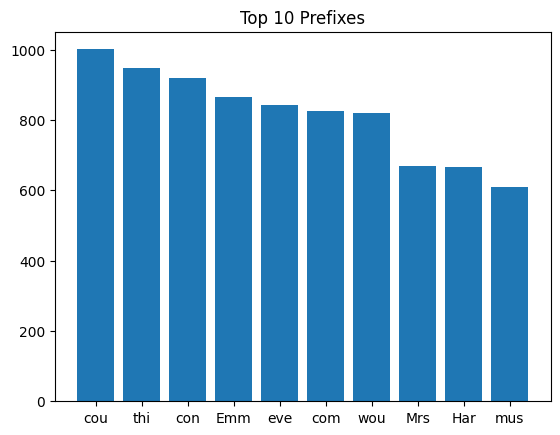

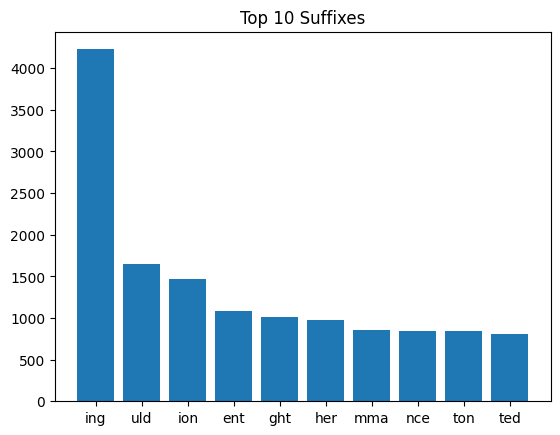

In [15]:
import matplotlib . pyplot as plt

labels,values = zip(*prefixes.most_common(10))
plt.bar(labels,values)
plt.title("Top 10 Prefixes")
plt.show()
labels,values = zip(*suffixes.most_common(10))
plt.bar(labels,values)
plt.title("Top 10 Suffixes")
plt.show()